## Loading

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [39]:
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_recall_fscore_support
import warnings
import os

In [40]:
df = pd.read_excel('data.xlsx')

In [41]:
df.head(20)

,Unnamed: 0,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,0,1,5,4,1,0,0,0.000,0.000,0.200,...,0.0,0.0,0.000,0.000,1,0,PL,PL,696,P2
1,1,2,1,0,1,0,0,0.000,0.000,1.000,...,0.0,0.0,0.000,0.000,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,2,3,8,0,8,1,0,0.125,0.000,1.000,...,0.0,0.0,0.000,0.000,1,0,ConsumerLoan,others,693,P2
3,3,5,3,2,1,0,0,0.000,0.000,0.333,...,0.0,0.0,0.000,0.000,0,0,AL,AL,753,P1
4,4,6,6,5,1,0,0,0.000,0.000,0.167,...,1.0,0.0,0.429,0.000,1,0,ConsumerLoan,PL,668,P3
5,5,8,6,4,2,0,0,0.000,0.000,0.333,...,0.0,0.0,0.000,0.000,0,0,ConsumerLoan,others,676,P2
6,6,9,1,0,1,0,0,0.000,0.000,1.000,...,0.0,0.0,0.000,0.000,0,0,ConsumerLoan,others,658,P4
7,7,11,7,2,5,1,0,0.143,0.000,0.714,...,0.0,1.0,0.000,0.333,0,0,CC,others,685,P2
8,8,13,2,2,0,0,0,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0,0,ConsumerLoan,others,669,P2
9,9,14,2,1,1,1,0,0.500,0.000,0.500,...,0.0,0.0,0.000,0.000,0,0,ConsumerLoan,ConsumerLoan,687,P2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  42064 non-null  int64  
 1   PROSPECTID                  42064 non-null  int64  
 2   Total_TL                    42064 non-null  int64  
 3   Tot_Closed_TL               42064 non-null  int64  
 4   Tot_Active_TL               42064 non-null  int64  
 5   Total_TL_opened_L6M         42064 non-null  int64  
 6   Tot_TL_closed_L6M           42064 non-null  int64  
 7   pct_tl_open_L6M             42064 non-null  float64
 8   pct_tl_closed_L6M           42064 non-null  float64
 9   pct_active_tl               42064 non-null  float64
 10  pct_closed_tl               42064 non-null  float64
 11  Total_TL_opened_L12M        42064 non-null  int64  
 12  Tot_TL_closed_L12M          42064 non-null  int64  
 13  pct_tl_open_L12M            420

In [43]:
df.describe()

,Unnamed: 0,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,...,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,Credit_Score
count,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.00000,42064.000000,42064.000000,42064.000000,...,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000
mean,21031.500000,25649.827477,5.262980,2.967383,2.295597,0.812643,0.48992,0.179032,0.097783,0.577452,...,0.883693,0.102962,0.193063,0.219169,0.074833,0.195497,0.064186,0.252235,0.056580,679.326336
std,12142.975198,14844.173396,7.463383,6.141098,2.404086,1.383559,1.05892,0.278043,0.210957,0.366110,...,40.622275,0.303913,0.394707,0.395100,0.250658,0.367414,0.225989,0.434300,0.231042,21.133619
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,469.000000
25%,10515.750000,12776.750000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.286000,...,0.152000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,668.000000
50%,21031.500000,25706.500000,3.000000,1.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.545000,...,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,679.000000
75%,31547.250000,38518.250000,6.000000,3.000000,3.000000,1.000000,1.00000,0.333000,0.100000,1.000000,...,0.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,690.000000
max,42063.000000,51336.000000,235.000000,216.000000,47.000000,27.000000,19.00000,1.000000,1.000000,1.000000,...,6327.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,809.000000


In [44]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df.replace(-99999.000, np.nan, inplace=True)

In [47]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

In [48]:
print(df.isnull().sum().sum())

0


## Plots

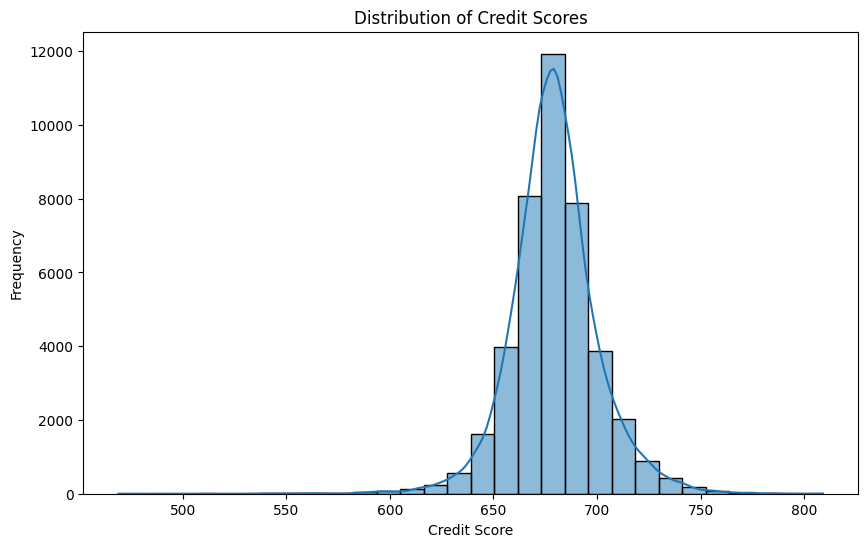

In [49]:
# Plotting to understand the data
# Distribution of Credit Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Credit_Score'], bins=30, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

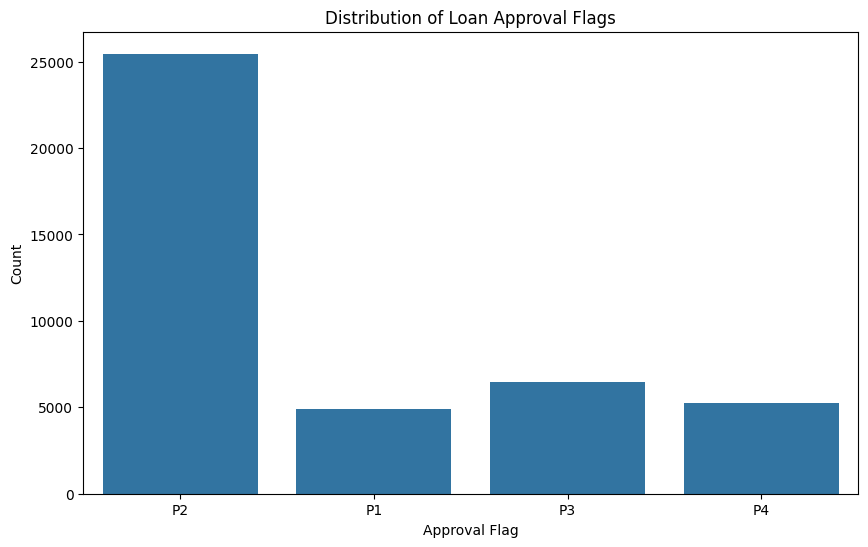

In [51]:
# Count plot for the Approved_Flag
plt.figure(figsize=(10, 6))
sns.countplot(x='Approved_Flag', data=df)
plt.title('Distribution of Loan Approval Flags')
plt.xlabel('Approval Flag')
plt.ylabel('Count')
plt.show()

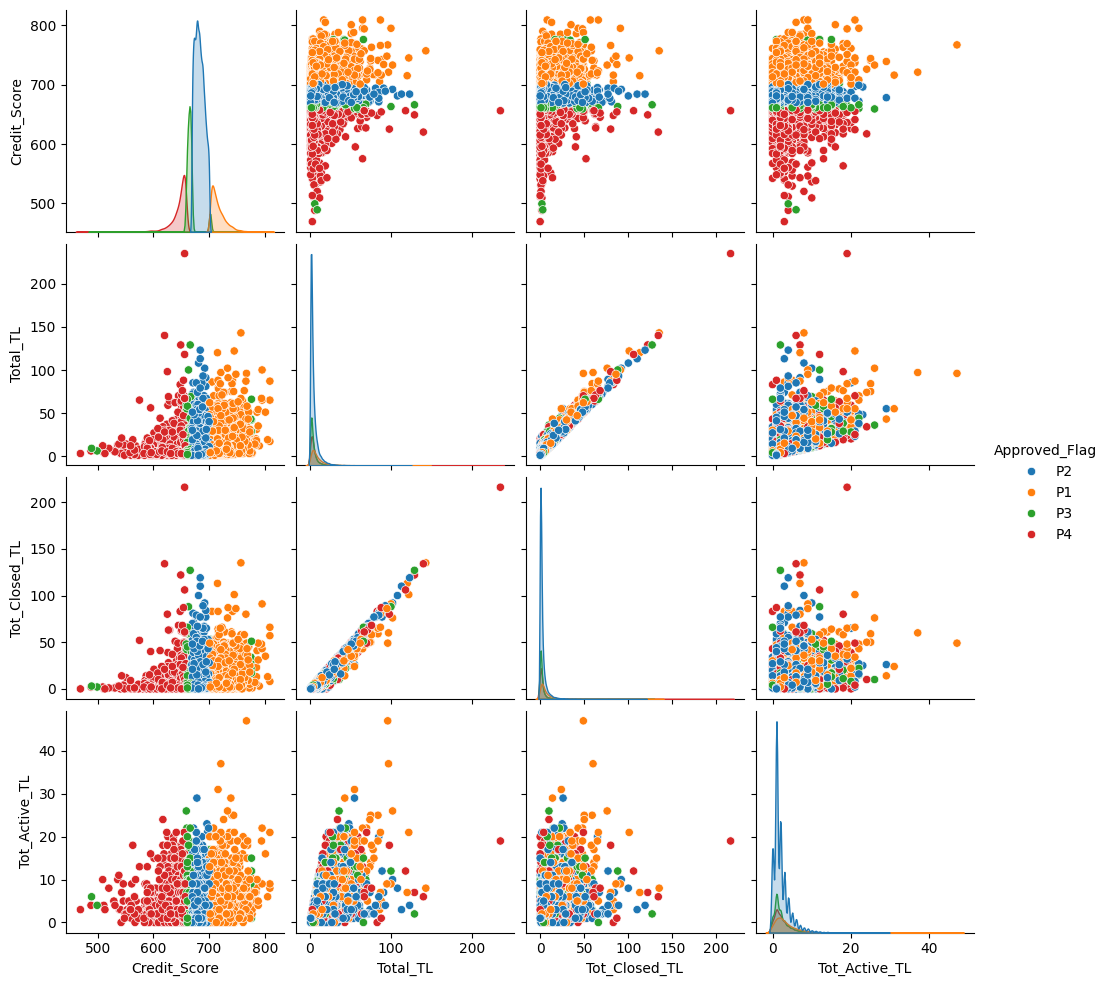

In [52]:

# Pairplot for a subset of features
subset_features = ['Credit_Score', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Approved_Flag']
sns.pairplot(df[subset_features], hue='Approved_Flag')
plt.show()

## Preprocessing

In [53]:
# Feature scaling: Normalize numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [54]:
# Manually encode the Approved_Flag column
approved_flag_mapping = {'P1': 1, 'P2': 2, 'P3': 3, 'P4': 4}
df['Approved_Flag'] = df['Approved_Flag'].map(approved_flag_mapping)

In [55]:
# Encode remaining categorical features
categorical_features = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

In [56]:
df

,Unnamed: 0,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,-1.732010,-1.727892,-0.035236,0.168151,-0.538921,-0.587364,-0.462666,-0.643909,-0.463527,-1.030993,...,-0.554724,-0.298551,-0.532094,-0.284027,1.721790,-0.244895,4,4,0.788973,2
1,-1.731927,-1.727825,-0.571193,-0.483207,-0.538921,-0.587364,-0.462666,-0.643909,-0.463527,1.154169,...,-0.554724,-0.298551,-0.532094,-0.284027,-0.580791,-0.244895,2,2,0.268469,2
2,-1.731845,-1.727758,0.366731,-0.483207,2.372823,0.135419,-0.462666,-0.194333,-0.463527,1.154169,...,-0.554724,-0.298551,-0.532094,-0.284027,1.721790,-0.244895,2,5,0.647018,2
3,-1.731763,-1.727623,-0.303215,-0.157528,-0.538921,-0.587364,-0.462666,-0.643909,-0.463527,-0.667710,...,-0.554724,-0.298551,-0.532094,-0.284027,-0.580791,-0.244895,0,0,3.486130,1
4,-1.731680,-1.727555,0.098753,0.330990,-0.538921,-0.587364,-0.462666,-0.643909,-0.463527,-1.121131,...,1.976309,-0.298551,0.635540,-0.284027,1.721790,-0.244895,2,4,-0.535946,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,1.731680,1.730139,-0.303215,-0.483207,0.293006,0.135419,-0.462666,0.553761,-0.463527,1.154169,...,-0.554724,-0.298551,-0.532094,-0.284027,-0.580791,-0.244895,2,2,-1.387679,4
42060,1.731763,1.730206,-0.169226,-0.157528,-0.122958,-0.587364,0.481704,-0.643909,0.721561,-0.211558,...,-0.554724,-0.298551,-0.532094,-0.284027,-0.580791,-0.244895,5,5,1.072885,1
42061,1.731845,1.730273,-0.437204,-0.320367,-0.538921,0.135419,0.481704,1.154394,1.906649,-0.211558,...,1.976309,-0.298551,2.189664,-0.284027,-0.580791,-0.244895,2,5,-0.867175,3
42062,1.731927,1.730341,-0.437204,-0.320367,-0.538921,-0.587364,-0.462666,-0.643909,-0.463527,-0.211558,...,-0.554724,-0.298551,-0.532094,-0.284027,-0.580791,-0.244895,2,5,0.315788,2


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  42064 non-null  float64
 1   PROSPECTID                  42064 non-null  float64
 2   Total_TL                    42064 non-null  float64
 3   Tot_Closed_TL               42064 non-null  float64
 4   Tot_Active_TL               42064 non-null  float64
 5   Total_TL_opened_L6M         42064 non-null  float64
 6   Tot_TL_closed_L6M           42064 non-null  float64
 7   pct_tl_open_L6M             42064 non-null  float64
 8   pct_tl_closed_L6M           42064 non-null  float64
 9   pct_active_tl               42064 non-null  float64
 10  pct_closed_tl               42064 non-null  float64
 11  Total_TL_opened_L12M        42064 non-null  float64
 12  Tot_TL_closed_L12M          42064 non-null  float64
 13  pct_tl_open_L12M            420

In [58]:
df['Approved_Flag'].head()

0    2
1    2
2    2
3    1
4    3
Name: Approved_Flag, dtype: int64

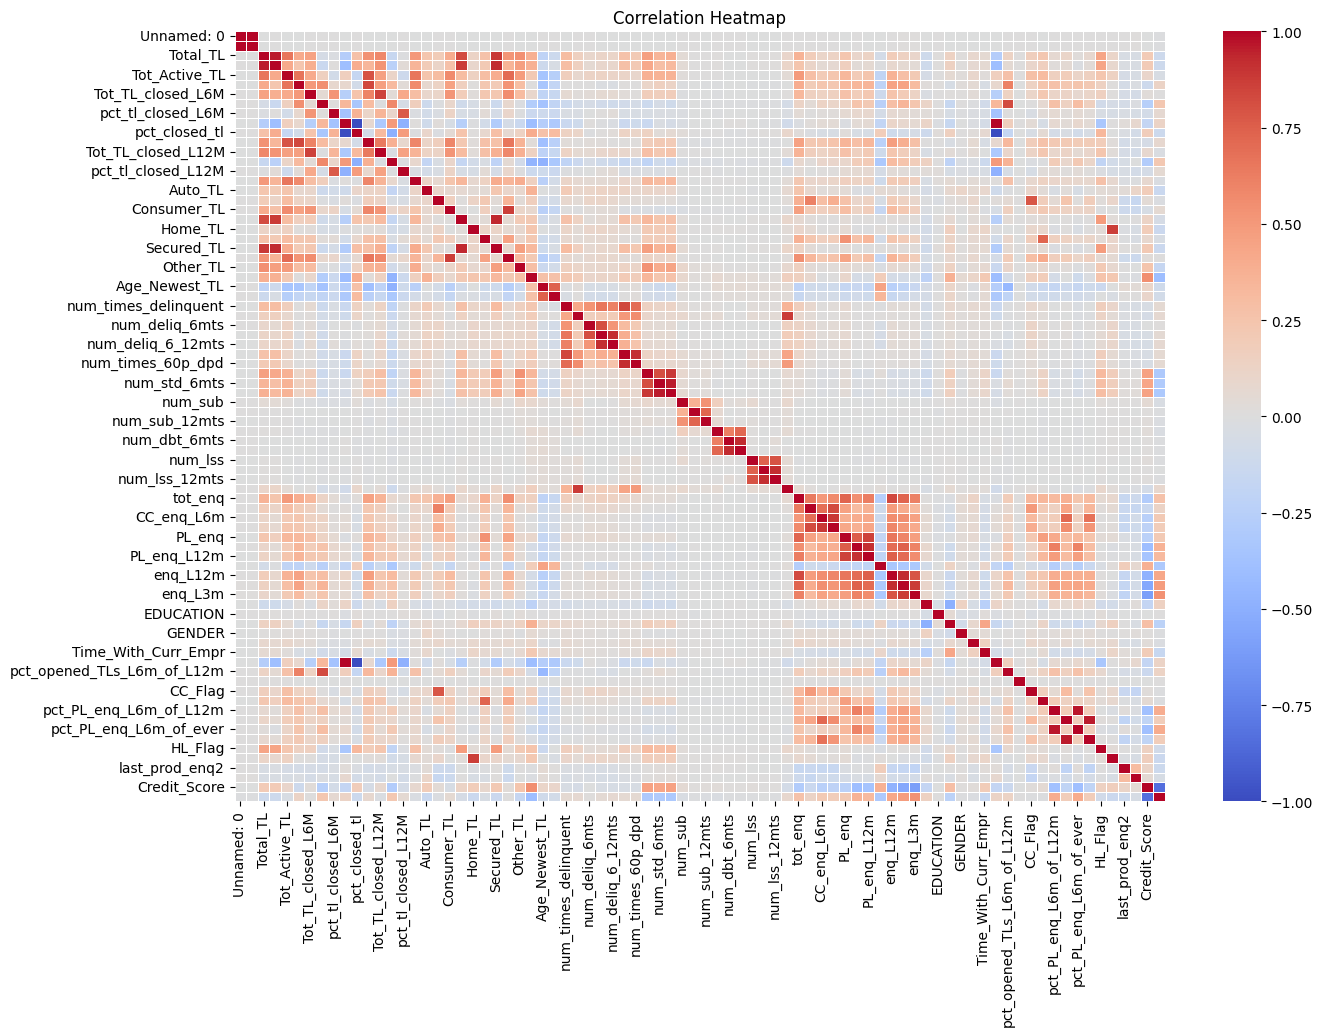

In [59]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## SMOTE